<a href="https://colab.research.google.com/github/dote7ant/KNN_and_Naive_Bayes_Classifications/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying whether a message is in class 0 or 1.

## Introduction

####a. Defining the question

Given the data use the Naive Bayes algorithm to classify whether a message falls in class 0 or 1. You are required to build the most appropriate model using the dataset provided.

####b. Defining metrics of success

The data is focused on word frequencies in a message and the class a particular message belongs. Using this data we are required to build a model that allows us to classify a message as class 0 or class 1.

The models used are:
1. Naive Bayes classification models (choose most appropriate)
2. Random forest classifier ( challenge purposes)

####c. Understanding the context

We know this is a classification dataset for a message, it could be email, document, sms or any other text based type where based on certain occurrence of words it is classified as class 0 or class 1. We do not know for sure what class 0 and 1 represent. We will carry this assumption that they are just classes. 

**Assumptions**
1. Data has a normal or Gaussian distribution.
2. Class 0 and 1 are just classes.

####d. Recording the experimental design

The following are the steps that we will take to conduct this project. They are listed below:


1. loading the required libraries
2. loading the data set
3. check the data
4. tidying the data
5. performing Exploratory Data Analysis (EDA) 
6. fit the data 
7. train the models
8. make predictions using the various models
9. evaluate the performance of the models
10. draw conclusions
11. make recommendations



##1. Reading the data and importing all the required libraries

In [92]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
# import data 
url = "https://archive.org/download/spambase_csv/spambase_csv.csv"
df = pd.read_csv(url)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


This data set has alot of columns

##2. Check the data

In [3]:
# look at the columns
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [4]:
# preview the first 5 rows
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
# preview the last 5 rows
df.tail(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# check the column data types 
print("The data types in our data set for various columns is as shown below:\n")
df.info()
print("-----------------------------------------------------------------------")

The data types in our data set for various columns is as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people   

The first 54 columns have float data types and the last 3 have int data types. Each of the columns have 4601 non null values which is an indication that there are no null values.

In [7]:
# check the data types
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

We observe the same observations as the info above.

In [8]:
# check number of rows and columns in the data set
print("There are", df.shape[0], "rows and", df.shape[1], "columns in our data set.")

There are 4601 rows and 58 columns in our data set.


In [9]:
# check the unique values in the data set
for column in df.columns:
  print("***************************", column, "********************************")
  print("This column has", df[column].nunique(), "unique values, they are shown below:\n")
  print(df[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** word_freq_make ********************************
This column has 142 unique values, they are shown below:

[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]
________________________________________________________________________________________________

______________________________________________

Most of the columns have many unique values. The only one with few is the class which might indicate whether a message is classified as class 0 or 1.

In [10]:
# we check for null values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

There are no missing values in this data set.

In [11]:
# check for duplicates
print("There are duplicates in our data set:", df.duplicated().any())

There are duplicates in our data set: True


We will remove the duplicates later on in the next chapter.

In [12]:
# show the values that are duplicates except the first occurence
df[df.duplicated()]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,8.33,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


There are 391 rows with duplicates.

In [15]:
# finding outliers in the training data set
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
a =(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
a

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,True,True,True,False,True,True,False,True,True,True,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
2,True,False,False,False,True,True,True,True,True,False,True,False,True,False,True,False,True,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,True,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4598,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False
4599,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [16]:
# first we check which columns have outliers
b = a.any() == True
print("These are the columns with outliers:\n",b)

# if the value is False then that column does not have outliers otherwise it does.

These are the columns with outliers:
 word_freq_make                 True
word_freq_address              True
word_freq_all                  True
word_freq_3d                   True
word_freq_our                  True
word_freq_over                 True
word_freq_remove               True
word_freq_internet             True
word_freq_order                True
word_freq_mail                 True
word_freq_receive              True
word_freq_will                 True
word_freq_people               True
word_freq_report               True
word_freq_addresses            True
word_freq_free                 True
word_freq_business             True
word_freq_email                True
word_freq_you                  True
word_freq_credit               True
word_freq_your                 True
word_freq_font                 True
word_freq_000                  True
word_freq_money                True
word_freq_hp                   True
word_freq_hpl                  True
word_freq_george          

Only once column does not have outliers. We will need to deal with them.

##3. Tidying up the data

In [13]:
# start with removing duplicates

# drop our duplicates that we found
df.drop_duplicates(keep='first', inplace = True)

df1 = df.copy()
# confirm there are no more duplicates
print("The data has duplicates: ", df1.duplicated().any())

The data has duplicates:  False


In [22]:
# check number of rows and columns in the new data set
print("There are", df1.shape[0], "rows and", df1.shape[1], "columns in our data set.")

There are 4210 rows and 58 columns in our data set.


In [23]:
# removing the outliers
out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
out.shape

(114, 58)

By removing outliers we get 114 rows this is a huge chunk of the data removed from 4210 rows to 114. But since Naive Bayes algorithm has the advantage of using less training data as other models we will consider working with this new data set.

##4. Exploratory data analysis

###a. Univarite analysis

In [20]:
# make a copy of the data frame
eda = out.copy()

In [21]:
# find descriptive statistics for the data
eda.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,114.0,114.0,114.000000,114.0,114.000000,114.0,114.0,114.0,114.0,114.000000,114.0,114.000000,114.0,114.0,114.0,114.0,114.0,114.0,114.000000,114.0,114.000000,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.000000,114.0,114.0,114.0,114.0,114.000000,114.0,114.000000,114.000000,114.0,114.000000,114.000000,114.000000,114.000000
mean,0.0,0.0,0.014649,0.0,0.044474,0.0,0.0,0.0,0.0,0.006754,0.0,0.174649,0.0,0.0,0.0,0.0,0.0,0.0,1.432281,0.0,0.288158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003158,0.0,0.0,0.0,0.0,0.035263,0.0,0.084588,0.001018,0.0,1.968623,7.184211,27.692982,0.184211
std,0.0,0.0,0.092470,0.0,0.187192,0.0,0.0,0.0,0.0,0.050877,0.0,0.481914,0.0,0.0,0.0,0.0,0.0,0.0,1.970804,0.0,0.731716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033717,0.0,0.0,0.0,0.0,0.101903,0.0,0.202994,0.010864,0.0,1.088017,8.484829,35.767224,0.389367
min,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000
25%,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.224000,3.000000,8.000000,0.000000
50%,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.660500,4.000000,16.000000,0.000000
75%,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.865000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.281750,8.000000,31.250000,0.000000
max,0.0,0.0,0.750000,0.0,0.940000,0.0,0.0,0.0,0.0,0.410000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,6.660000,0.0,2.940000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360000,0.0,0.0,0.0,0.0,0.478000,0.0,0.787000,0.116000,0.0,6.666000,55.000000,226.000000,1.000000


most of the columns have 0 in them this makes us re-evaluate the use of the data with no outliers.

In [24]:
# find descriptive statistics for the data
df1.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

This is much better as it has data we can make use of unlike the one above.

In [59]:
# find the counts
df1['class'].value_counts()

0    2531
1    1679
Name: class, dtype: int64

We might want to upsample or downsample this data for testing of how that might affect the performance.

In [25]:
# find the skewness of the data
df1.skew()

word_freq_make                 5.869855
word_freq_address             13.464664
word_freq_all                  2.980623
word_freq_3d                  27.209539
word_freq_our                  4.696946
word_freq_over                 6.122653
word_freq_remove               6.808707
word_freq_internet             9.734232
word_freq_order                5.284306
word_freq_mail                 8.568579
word_freq_receive              5.078281
word_freq_will                 2.828005
word_freq_people               6.889952
word_freq_report              11.564142
word_freq_addresses            7.513375
word_freq_free                 9.387745
word_freq_business             5.567668
word_freq_email                5.453867
word_freq_you                  1.524251
word_freq_credit              15.430174
word_freq_your                 2.245707
word_freq_font                 9.541533
word_freq_000                  5.859524
word_freq_money               15.556682
word_freq_hp                   5.638834


All columns have positive skewness. Skewness indicates the direction and relative magnitude of a distribution's deviation from the normal distribution

In [27]:
# find the kurtosis of the data 
df1.kurt()

word_freq_make                  54.351406
word_freq_address              306.685973
word_freq_all                   12.941447
word_freq_3d                   788.370058
word_freq_our                   37.064801
word_freq_over                  71.603267
word_freq_remove                76.381647
word_freq_internet             167.550219
word_freq_order                 48.011373
word_freq_mail                 162.539033
word_freq_receive               34.656119
word_freq_will                  12.096068
word_freq_people                82.596297
word_freq_report               219.645155
word_freq_addresses             69.493809
word_freq_free                 157.691742
word_freq_business              43.514184
word_freq_email                 48.157461
word_freq_you                    4.998066
word_freq_credit               424.685771
word_freq_your                   8.094203
word_freq_font                  99.666089
word_freq_000                   49.119948
word_freq_money                340

We observe that all columns apart from class are leptokurtic in nature while class is platykurtic.

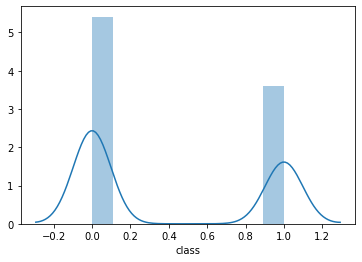

In [30]:
# distribution of class
sns.distplot(df1["class"])

The class of 0 is the most.

###b. Bivariate analysis

In [31]:
# find the correlation 
corr = df1.corr()
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0

We do not plot a heatmap for the correlation as observation is bad.

Multicollinearity check

In [33]:
# find the VIF matrix
print("Below is our VIF matrix\n")
pd.DataFrame(np.linalg.inv(df1.corr().values), index = corr.index, columns=corr.columns)

Below is our VIF matrix



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.101450,-0.004258,-0.016107,-0.001599,0.007134,-0.014006,0.032895,0.048494,-0.061818,-0.005302,-0.003367,-0.068846,-0.019514,-0.008127,0.053952,-0.034086,-0.053676,-0.025335,-0.048433,0.016683,-0.038223,0.019569,-0.108680,-0.182992,0.019177,0.006546,0.018227,0.000296,0.025265,0.018961,-0.003867,0.464795,0.019293,-0.540870,0.006731,0.026585,0.029225,0.001144,-0.015889,0.039323,-0.024212,-0.001426,-0.012697,0.007367,0.013918,0.016788,0.000584,0.006163,0.010822,-0.007722,0.021812,-0.019639,-0.017965,0.007037,-0.031584,0.008650,-0.040019,0.017967
word_freq_address,-0.004258,1.107986,0.003902,0.016125,-0.010141,0.016181,-0.037115,0.015532,-0.005847,-0.189242,0.002536,-0.027613,0.011321,-0.011107,0.007371,-0.011857,0.017981,-0.194594,0.021717,0.028961,-0.066034,0.014233,0.044664,-0.025531,0.024925,0.016667,-0.002605,0.027951,0.024145,0.048067,0.029799,-0.521931,0.011642,0.283938,0.005348,0.050290,-0.025838,0.010810,0.016156,0.074762,0.005771,0.006882,-0.042628,0.015248,-0.042033,0.011999,0.015443,0.012663,-0.029043,0.044266,0.017044,-0.004061,-0.015979,-0.027783,0.001481,-0.037494,-0.004253,-0.013719
word_freq_all,-0.016107,0.003902,1.096759,0.026681,-0.011308,-0.015840,0.037645,0.033687,-0.020911,0.023795,0.005632,-0.049675,-0.004287,0.009682,-0.058045,-0.020333,0.030404,-0.059859,-0.068195,0.001331,-0.078917,0.047176,-0.042089,0.032807,0.044343,0.000377,0.047332,0.008625,0.050045,-0.059597,-0.030088,-0.080251,0.035529,0.114979,0.015383,-0.017833,0.019918,-0.034965,-0.016469,0.026681,-0.000895,-0.033629,0.015726,0.043739,0.036455,0.039783,-0.031946,0.015265,0.004193,-0.012425,0.011985,-0.057687,0.011628,0.008159,-0.089941,-0.006818,-0.000336,-0.074631
word_freq_3d,-0.001599,0.016125,0.026681,1.009493,0.010155,0.021284,0.001560,0.002105,0.011507,0.002516,0.024326,0.013596,0.020256,-0.001084,0.005648,0.012035,0.008761,-0.015289,0.021181,0.014029,0.008709,-0.022613,-0.003962,-0.020681,0.006205,0.003856,0.004950,0.003878,-0.002576,-0.000263,0.001537,-0.030139,0.006211,0.013233,-0.002885,0.001735,-0.003621,-0.000554,-0.004924,0.010929,0.000427,0.002317,0.002192,0.004141,0.005136,0.005518,0.001042,-0.000218,0.008908,0.023760,0.006357,0.014313,0.007629,0.010402,0.013059,-0.033460,-0.003156,-0.082426
word_freq_our,0.007134,-0.010141,-0.011308,0.010155,1.139481,0.001406,-0.046338,0.041085,0.048843,0.004994,-0.002290,-0.036990,-0.001756,0.000683,-0.028045,-0.009758,-0.096169,-0.002162,-0.022129,0.030061,-0.053433,0.043880,0.009717,0.056841,-0.001009,0.030155,0.028916,0.017395,-0.032161,0.002050,0.014500,-0.128635,0.005929,0.059067,0.007663,0.021537,0.008392,-0.140857,0.012841,0.021458,0.008484,-0.118980,0.015316,-0.028758,0.010653,0.045487,0.021765,0.016338,-0.007988,0.023191,0.000155,0.047257,0.032241,0.007414,-0.036345,-0.023949,0.059177,-0.250952
word_freq_over,-0.014006,0.016181,-0.015840,0.021284,0.001406,1.087195,0.015354,-0.037792,-0.037802,0.041113,0.011952,0.002957,-0.027256,0.009800,-0.073802,0.043424,0.009837,-0.003548,-0.017139,-0.021385,-0.010556,0.008443,-0.103475,-0.010821,0.015885,0.031079,0.010283,0

Word frequency 108 has a high VIF score so we will drop it. word frequecny 415  has a VIF score of 99. 

In [35]:
# dropping 
df1.drop(columns = 'word_freq_857', inplace = True)

In [37]:
# find the VIF matrix
corr = df1.corr()
print("Below is our VIF matrix\n")
pd.DataFrame(np.linalg.inv(df1.corr().values), index = corr.index, columns=corr.columns)

Below is our VIF matrix



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.099338,-0.001887,-0.015742,-0.001462,0.007719,-0.013537,0.033399,0.048645,-0.061080,-0.005854,-0.003490,-0.068764,-0.018947,-0.007875,0.053379,-0.034108,-0.054146,-0.026151,-0.048096,0.017352,-0.037496,0.019958,-0.107602,-0.182081,0.019529,0.006818,0.019008,0.000325,0.027240,0.020878,-0.001418,0.019539,-0.092709,0.007456,0.029429,0.027996,0.001274,-0.015588,0.048205,-0.024208,-0.002066,-0.011815,0.007457,0.014501,0.017339,0.000655,0.006401,0.011215,-0.006022,0.021793,-0.020665,-0.020044,0.006664,-0.035561,0.008714,-0.040509,0.017961
word_freq_address,-0.001887,1.105322,0.003492,0.015971,-0.010797,0.015654,-0.037680,0.015362,-0.006675,-0.188622,0.002674,-0.027705,0.010684,-0.011390,0.008015,-0.011832,0.018509,-0.193678,0.021338,0.028211,-0.066850,0.013796,0.043454,-0.026554,0.024529,0.016361,-0.003482,0.027918,0.021927,0.045915,0.027049,0.011366,-0.219314,0.004533,0.047096,-0.024458,0.010663,0.015818,0.064789,0.005766,0.007600,-0.043619,0.015147,-0.042688,0.011381,0.015362,0.012396,-0.029484,0.042358,0.017065,-0.002908,-0.013644,-0.027365,0.005947,-0.037566,-0.003702,-0.013712
word_freq_all,-0.015742,0.003492,1.096697,0.026658,-0.011409,-0.015921,0.037558,0.033661,-0.021038,0.023890,0.005653,-0.049690,-0.004385,0.009638,-0.057946,-0.020329,0.030485,-0.059718,-0.068254,0.001215,-0.079043,0.047109,-0.042275,0.032650,0.044282,0.000330,0.047197,0.008619,0.049704,-0.059928,-0.030510,0.035487,0.037600,0.015258,-0.018324,0.020130,-0.034988,-0.016521,0.025148,-0.000896,-0.033519,0.015574,0.043724,0.036354,0.039688,-0.031959,0.015224,0.004125,-0.012718,0.011988,-0.057509,0.011987,0.008224,-0.089254,-0.006829,-0.000251,-0.074630
word_freq_3d,-0.001462,0.015971,0.026658,1.009484,0.010117,0.021254,0.001527,0.002095,0.011459,0.002551,0.024334,0.013591,0.020219,-0.001101,0.005685,0.012036,0.008792,-0.015236,0.021159,0.013986,0.008662,-0.022638,-0.004032,-0.020740,0.006182,0.003838,0.004900,0.003876,-0.002704,-0.000387,0.001378,0.006195,-0.015828,-0.002932,0.001550,-0.003542,-0.000562,-0.004943,0.010353,0.000427,0.002358,0.002135,0.004135,0.005098,0.005482,0.001037,-0.000233,0.008883,0.023649,0.006358,0.014380,0.007764,0.010426,0.013317,-0.033464,-0.003124,-0.082426
word_freq_our,0.007719,-0.010797,-0.011409,0.010117,1.139319,0.001276,-0.046477,0.041043,0.048639,0.005147,-0.002256,-0.037013,-0.001913,0.000613,-0.027886,-0.009752,-0.096039,-0.001937,-0.022222,0.029876,-0.053635,0.043773,0.009419,0.056589,-0.001106,0.030080,0.028700,0.017387,-0.032707,0.001520,0.013822,0.005861,-0.064964,0.007462,0.020750,0.008733,-0.140894,0.012757,0.019000,0.008483,-0.118803,0.015072,-0.028783,0.010491,0.045334,0.021745,0.016272,-0.008096,0.022721,0.000160,0.047541,0.032816,0.007517,-0.035244,-0.023967,0.059312,-0.250950
word_freq_over,-0.013537,0.015654,-0.015921,0.021254,0.001276,1.087091,0.015243,-0.037825,-0.037966,0.041235,0.011980,0.002939,-0.027382,0.009744,-0.073674,0.043429,0.009942,-0.003367,-0.017213,-0.021533,-0.010717,0.008357,-0.103714,-0.011023,0.015807,0.031019,0.010110,0.024958,0.002645,-0.023064,0.006649,0.008686,-0.047718,0.011

The word frequency 415 dropped to 4 we will also remove this as it is close to 5.

In [38]:
# dropping 
df1.drop(columns = 'word_freq_415', inplace = True)

In [39]:
# find the VIF matrix
corr = df1.corr()
print("Below is our VIF matrix\n")
pd.DataFrame(np.linalg.inv(df1.corr().values), index = corr.index, columns=corr.columns)

Below is our VIF matrix



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.097351,-0.006587,-0.014937,-0.001801,0.006326,-0.014560,0.033084,0.049361,-0.061778,-0.004464,-0.004456,-0.066045,-0.019249,-0.007694,0.055000,-0.034419,-0.052036,-0.020319,-0.050259,0.017709,-0.038868,0.019067,-0.107445,-0.181955,0.018981,0.004629,0.015451,-0.000533,0.016674,0.011846,-0.014062,0.019685,0.003752,0.016667,0.029288,0.000413,-0.015859,0.002555,-0.023319,0.001999,-0.014704,0.007722,0.012947,0.016368,0.000396,0.006426,0.010789,-0.012979,0.021729,-0.021292,-0.019759,0.008009,-0.038091,0.012974,-0.041473,0.017015
word_freq_address,-0.006587,1.094204,0.005399,0.015168,-0.014091,0.013235,-0.038425,0.017057,-0.008327,-0.185332,0.000389,-0.021273,0.009969,-0.010963,0.011851,-0.012568,0.023499,-0.179881,0.016223,0.029056,-0.070094,0.011687,0.043826,-0.026257,0.023232,0.011184,-0.011896,0.025889,-0.003068,0.024549,-0.002862,0.011713,-0.004229,0.016906,-0.021402,0.008626,0.015175,-0.043201,0.007870,0.017215,-0.050451,0.015773,-0.046365,0.009084,0.014749,0.012454,-0.030491,0.025902,0.016913,-0.004390,-0.012971,-0.024184,-0.000039,-0.027488,-0.005981,-0.015949
word_freq_all,-0.014937,0.005399,1.096370,0.026795,-0.010844,-0.015506,0.037686,0.033370,-0.020755,0.023326,0.006045,-0.050792,-0.004262,0.009565,-0.058604,-0.020203,0.029630,-0.062084,-0.067377,0.001070,-0.078487,0.047470,-0.042339,0.032599,0.044505,0.001218,0.048639,0.008967,0.053989,-0.056265,-0.025382,0.035428,0.016760,-0.013149,0.019606,-0.034639,-0.016410,0.043662,-0.001257,-0.035168,0.016745,0.043616,0.036984,0.040081,-0.031854,0.015214,0.004297,-0.009897,0.012014,-0.057255,0.011872,0.007678,-0.088228,-0.008557,0.000139,-0.074247
word_freq_3d,-0.001801,0.015168,0.026795,1.009426,0.009880,0.021079,0.001473,0.002217,0.011340,0.002789,0.024169,0.014055,0.020167,-0.001070,0.005962,0.011983,0.009152,-0.014240,0.020790,0.014047,0.008428,-0.022790,-0.004005,-0.020718,0.006088,0.003464,0.004292,0.003730,-0.004508,-0.001929,-0.000780,0.006220,-0.003564,-0.000629,-0.003321,-0.000709,-0.004989,0.002559,0.000578,0.003052,0.001642,0.004180,0.004832,0.005316,0.000993,-0.000229,0.008810,0.022462,0.006347,0.014273,0.007812,0.010655,0.012885,-0.032737,-0.003288,-0.082587
word_freq_our,0.006326,-0.014091,-0.010844,0.009880,1.138344,0.000560,-0.046698,0.041545,0.048149,0.006122,-0.002933,-0.035107,-0.002125,0.000740,-0.026750,-0.009970,-0.094560,0.002150,-0.023738,0.030126,-0.054596,0.043148,0.009529,0.056677,-0.001490,0.028546,0.026207,0.016786,-0.040111,-0.004809,0.004962,0.005964,0.004867,0.011807,0.009638,-0.141497,0.012567,-0.012988,0.009106,-0.115955,0.013048,-0.028598,0.009402,0.044654,0.021563,0.016289,-0.008395,0.017846,0.000115,0.047102,0.033015,0.008460,-0.037017,-0.020982,0.058638,-0.251612
word_freq_over,-0.014560,0.013235,-0.015506,0.021079,0.000560,1.086564,0.015081,-0.037456,-0.038325,0.041951,0.011482,0.004338,-0.027537,0.009837,-0.072840,0.043269,0.011027,-0.000365,-0.018326,-0.021349,-0.011423,0.007898,-0.103633,-0.010958,0.015525,0.029892,0.008279,0.024517,-0.002794,-0.027712,0.000141,0.008761,0.009238,0.001487,0.006306,0.006559,0.020009,0.015200,0.009911,0.02702

There are no more high VIF values which tells us that there are no columns that are highly colinear.

##6. Solution

Function

In [41]:
def naive(X, y, s):
  # our assumption is that the data has normal distribution so we use this to make it true
  normalizer = Normalizer(norm='l2')
  normalizer.transform(X)
  
  # get train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  # Instantiate the GaussianNB()
  model = GaussianNB()
  # Fit the model
  model.fit(X_train, y_train)
  
  # Make predictions on the test data
  y_pred = model.predict(X_test)

  # Evaluate the performance of the model
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

### Baseline model

#### Baseline model 1 random test size

In [45]:
X = df1.drop(columns = 'class')
y = df1['class']
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
naive(X, y, s)

This run has a test size of 0.2
Accuracy: 0.8254156769596199
[[361 134]
 [ 13 334]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.83       842
   macro avg       0.84      0.85      0.83       842
weighted avg       0.86      0.83      0.83       842



We have an accuracy of 83% 

####Baseline model 2 random test size

In [51]:
X = df1.drop(columns = 'class')
y = df1['class']
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
naive(X, y, s)

This run has a test size of 0.4
Accuracy: 0.8254156769596199
[[361 134]
 [ 13 334]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.83       842
   macro avg       0.84      0.85      0.83       842
weighted avg       0.86      0.83      0.83       842



Both models have the same accuracy and confusion matrix.

###Optimization

In [53]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
# parameters to tune
params = {'var_smoothing':  list(np.arange(0.0000000001, 0.0000000008))}

# number of folds
kfold = KFold(n_splits=10, shuffle=True)
model = GaussianNB()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# fitting
search.fit(X, y)

# print out the best parameters
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'var_smoothing': 1e-10}


In [80]:
def naive_1(X, y, s):
  # our assumption is that the data has normal distribution so we use this to make it true
  normalizer = Normalizer(norm='l2')
  normalizer.transform(X)
  
  # get train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  # Instantiate the GaussianNB()
  model = GaussianNB(var_smoothing=1e-10)
  # Fit the model
  model.fit(X_train, y_train)
  
  # Make predictions on the test data
  y_pred = model.predict(X_test)

  # Evaluate the performance of the model
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

In [82]:
X = df1.drop(columns = 'class')
y = df1['class']
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
naive_1(X, y, s)

This run has a test size of 0.4
Accuracy: 0.8206650831353919
[[360 135]
 [ 16 331]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       495
           1       0.71      0.95      0.81       347

    accuracy                           0.82       842
   macro avg       0.83      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



In [83]:
X = df1.drop(columns = 'class')
y = df1['class']
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
naive_1(X, y, s)

This run has a test size of 0.5
Accuracy: 0.8206650831353919
[[360 135]
 [ 16 331]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       495
           1       0.71      0.95      0.81       347

    accuracy                           0.82       842
   macro avg       0.83      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



The accuracy has not improved at all. This means the baseline models were at there optimal.

##7. Challenging the solution

In [84]:
df1.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_data', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
       'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
       'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',
       'word_freq_conference', 'char_freq_%3B', 'char_freq_%28',


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

test_features = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_data', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
       'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
       'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',
       'word_freq_conference', 'char_freq_%3B', 'char_freq_%28',
       'char_freq_%5B', 'char_freq_%21', 'char_freq_%24', 'char_freq_%23',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total']


class trees:
  def __init__(self, X, y, test_features):
    self.X = X
    self.y = y
    self.test_features = test_features
    
  def rand_tree(self, n, s, d):
    # Train using 70% of the data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    forest = RandomForestClassifier(n_estimators =n, random_state=42, min_samples_split =s, max_depth=d)
    forest = forest.fit(X_train, y_train)
    tree = DecisionTreeClassifier(max_depth=d)

    # Train it on our training set.
    tree = tree.fit(X_train, y_train)

    # Predict based on the model we've trained, note that we apply it to the whole data set 
    y_pred_tree = tree.predict(X)

    # Predict based on the model we've trained
    y_pred = forest.predict(X_test)
    comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    print(comparison_frame.describe())

    # And now we assess the scores
    print('The accuracy score is:', accuracy_score(y_test, y_pred))
    print('The f1 score is:', f1_score(y_test, y_pred))
    def viz(self):
      dot_data = StringIO()
      # pick a specific tree from the forest
      tree = forest.estimators_[50]

      export_graphviz(tree, out_file=dot_data,  
                      filled=True, rounded=True,
                      special_characters=True,feature_names = test_features)
      graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
      graph.write_png('absenteism_forest.png')
      display(Image(graph.create_png()))
    viz(self)
    def imp(self):
      # Get numerical feature importances
      importances = list(tree.feature_importances_)

      # We now use some Python magic to connect each feature with its importance
      # List of tuples with variable and importance
      feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

      print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
      print()

      # Nice to have: We can sort the values in descending order, since we care about the most important features first.
      feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

      # Print out the feature and importances 
      [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

      # list of x locations for plotting
      x_values = list(range(len(importances)))
      # Make a bar chart
      plt.bar(x_values, importances, orientation = 'vertical')
      # Tick labels for x axis
      plt.xticks(x_values, test_features, rotation='vertical')
      # Axis labels and title
      plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
    #imp(self)
 

In [86]:
# get the independent and dependent variables
X = df1.drop(columns='class').values
y = df1['class'].values

In [93]:
# call the function and pass in the independent and dependent variables
a = trees(X, y, test_features)

            Actual    Predicted
count  1263.000000  1263.000000
mean      0.416469     0.380839
std       0.493168     0.485786
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000
The accuracy score is: 0.9263657957244655
The f1 score is: 0.9076464746772591


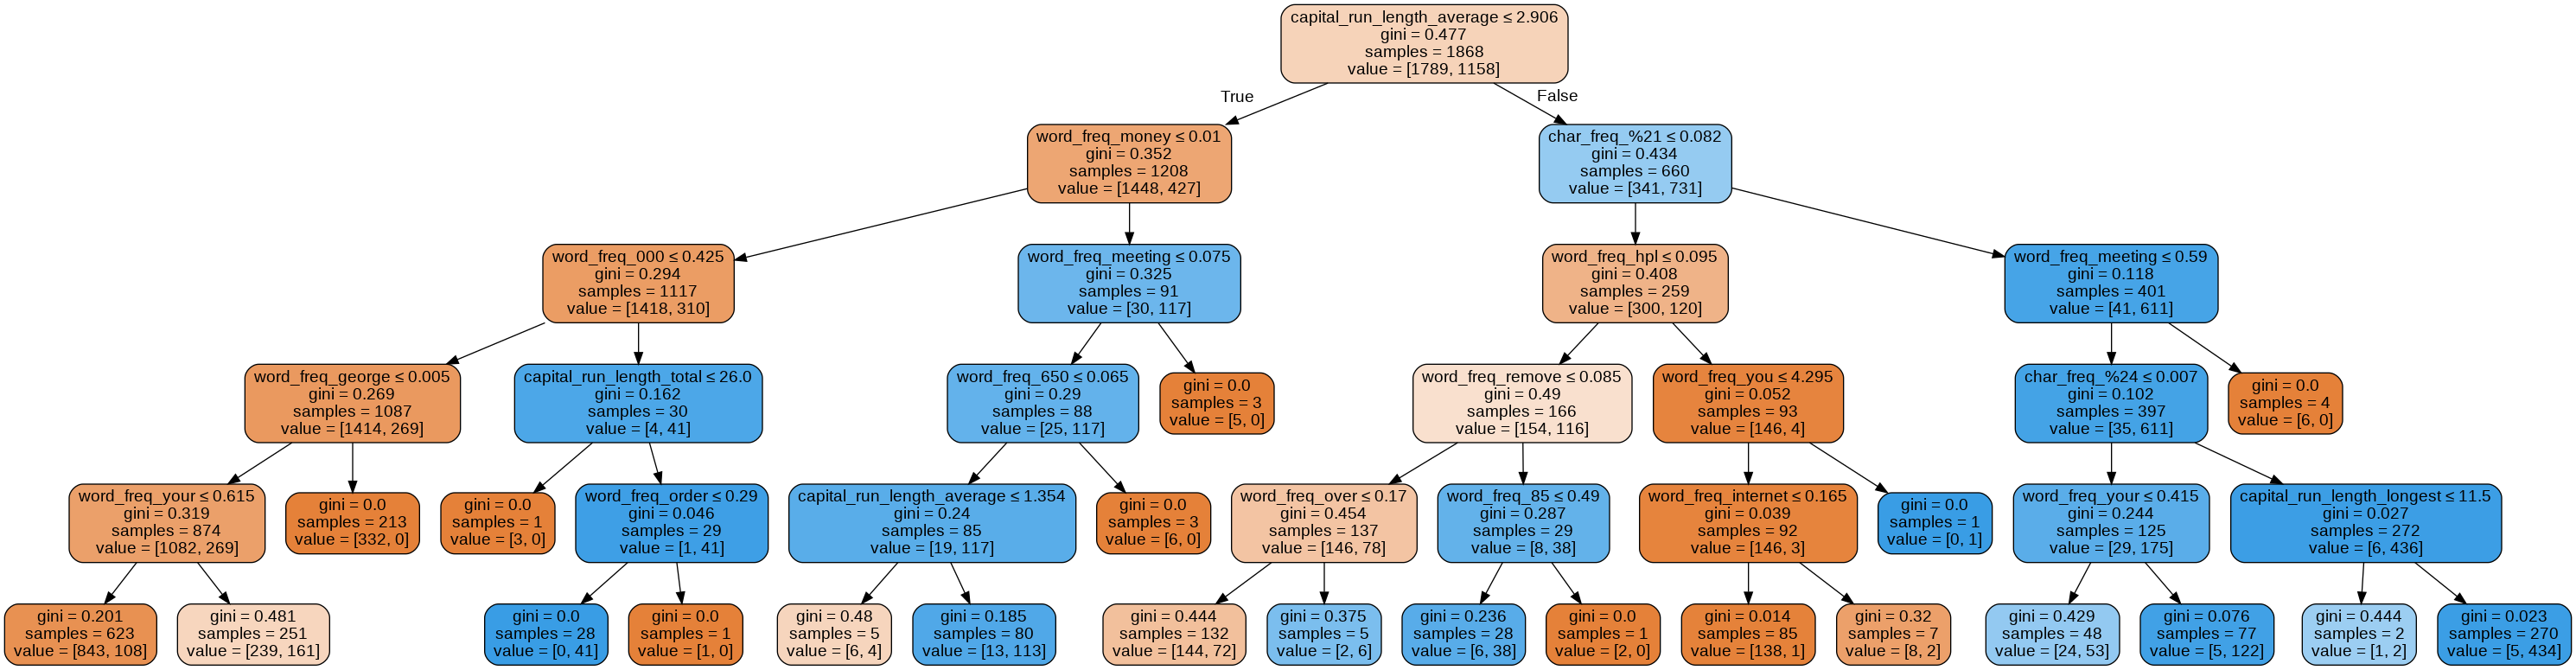

[('word_freq_make', 0.0), ('word_freq_address', 0.0), ('word_freq_all', 0.0), ('word_freq_3d', 0.0), ('word_freq_our', 0.0), ('word_freq_over', 0.0), ('word_freq_remove', 0.24), ('word_freq_internet', 0.0), ('word_freq_order', 0.0), ('word_freq_mail', 0.0), ('word_freq_receive', 0.0), ('word_freq_will', 0.0), ('word_freq_people', 0.0), ('word_freq_report', 0.0), ('word_freq_addresses', 0.0), ('word_freq_free', 0.04), ('word_freq_business', 0.0), ('word_freq_email', 0.0), ('word_freq_you', 0.01), ('word_freq_credit', 0.0), ('word_freq_your', 0.0), ('word_freq_font', 0.0), ('word_freq_000', 0.0), ('word_freq_money', 0.01), ('word_freq_hp', 0.07), ('word_freq_hpl', 0.0), ('word_freq_george', 0.01), ('word_freq_650', 0.0), ('word_freq_lab', 0.0), ('word_freq_labs', 0.0), ('word_freq_telnet', 0.0), ('word_freq_data', 0.0), ('word_freq_85', 0.0), ('word_freq_technology', 0.0), ('word_freq_1999', 0.0), ('word_freq_parts', 0.0), ('word_freq_pm', 0.0), ('word_freq_direct', 0.0), ('word_freq_cs'

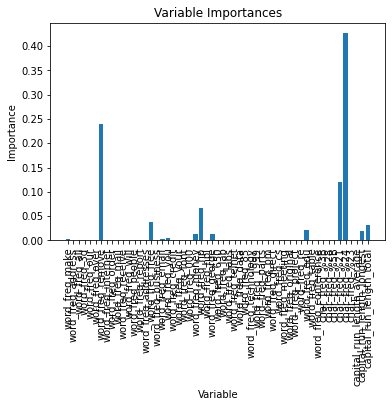

In [94]:
# here we pass in the number of n estimators, minimum sample splits and the maximum depth 
# they are in that order
# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

The accuracy score for this is 0.92 which is a great improvement compared to the gaussian models.

With the most important features.

In [103]:
test_features = ['char_freq_%24', 'word_freq_remove', 'char_freq_%21', 'word_freq_hp', 'word_freq_free', 'capital_run_length_total', 'word_freq_edu', 'capital_run_length_longest', 'word_freq_you', 'word_freq_money', 'word_freq_george']
# get the independent and dependent variables for the baseline model
X = df1[test_features].values
y = df1['class'].values

In [104]:
# call the function and pass in the independent and dependent variables
a = trees(X, y, test_features)

            Actual    Predicted
count  1263.000000  1263.000000
mean      0.416469     0.380048
std       0.493168     0.485590
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000
The accuracy score is: 0.9176563737133808
The f1 score is: 0.8966202783300198


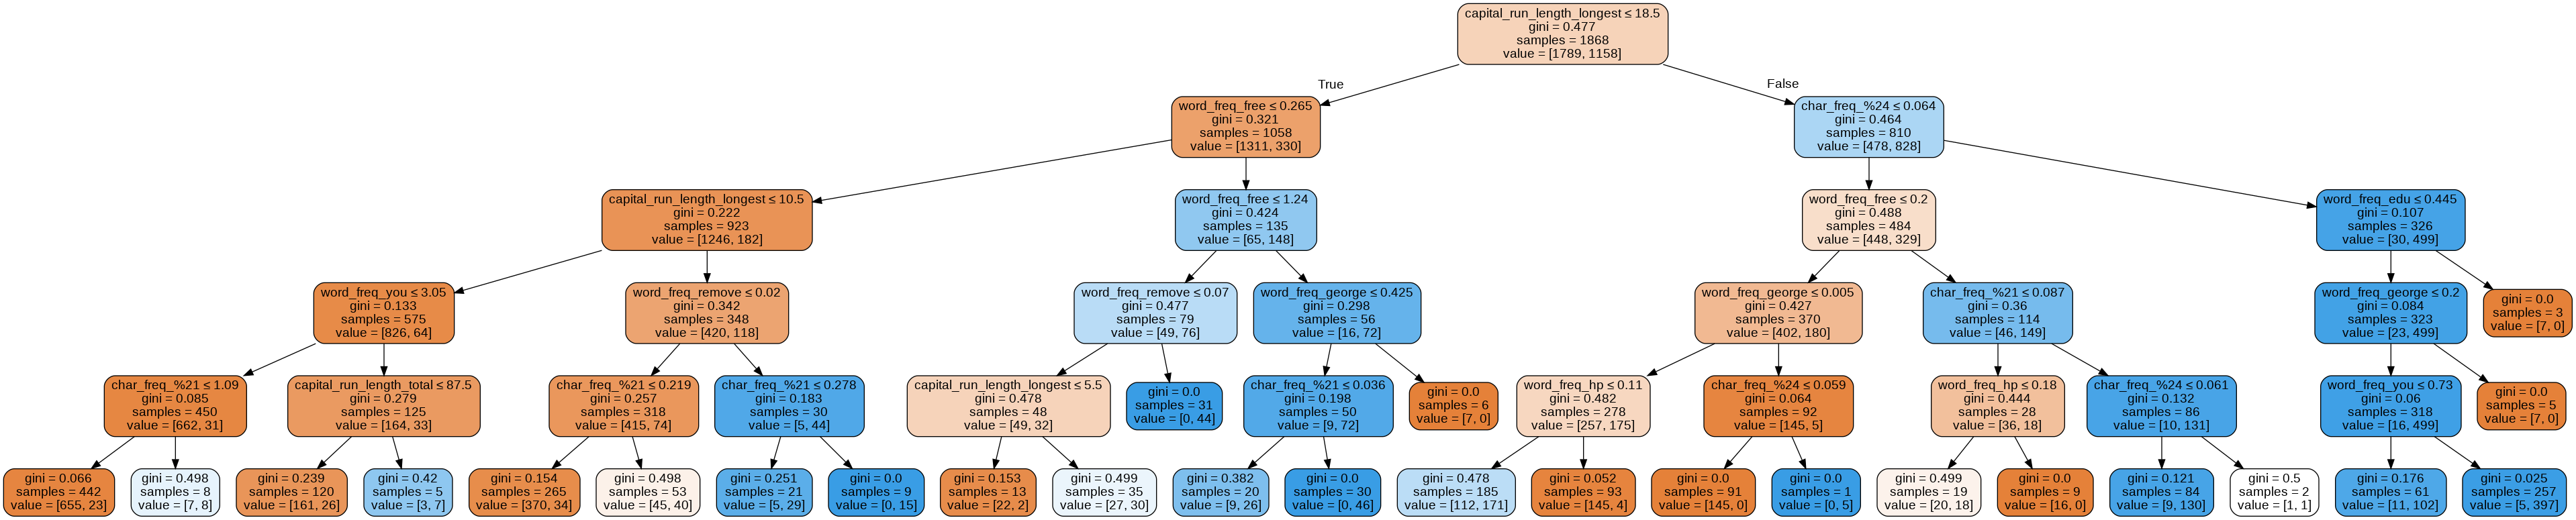

In [105]:
# here we pass in the number of n estimators, minimum sample splits and the maximum depth 
# they are in that order
# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

The performance dropped by a small margin.

##8. Conclusion

The baseline models performed better than the optimized models with an accuracy of 0.83. The optimized ones have an accuracy of 0.82. There are no descriptions to what each column is. There were two columns that were highly correlated that is word_freq_108 and word_freq415. The class column does not say what 0 and 1 represent.

The random forest classifier has the best performance. This might be because the data has been organized in a way that it can handle otherwise the naive classifications would be the best choice.

##9. Recommendations

We recommend that: 
1. A description be given with the data as there are many columns with no explanation as to what they mean and represent.
2. Perform dimension reduction to the data.
3. Use of different classifiers.

##10. Follow up questions

In the class column what does 0 and 1 stand for?

Did we have the right data? No,more explanation to the data is needed to conclusively say we had the right data. 